# ClimateWins Project

## Content
### 1. Importing libraries and data
### 2. Splitting the data
### 3. Randome Forest Optimization
### 3.1. Grid Search
### 3.2 Randome Search
### 4. Applying Random Forest Classifier using hyperparameters resulted from optimization 

## 1. Importing libraries and data

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# Create a path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/02 Data/"

In [7]:
# Import weather data, cleaned file
df=pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'))

In [8]:
df.head(1)

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  

[1 rows x 136 columns]

In [9]:
# Remove irrelevant column
df=df.drop(columns=['Unnamed: 0'])

In [10]:
df.shape

(22950, 135)

In [11]:
df.head(1)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  

[1 rows x 135 columns]

In [12]:
# Import Pleasant weather data, cleaned file
df_ans=pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_answers_cleaned.csv'))

In [13]:
df_ans.head(1)

Unnamed: 0  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0           0                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

In [14]:
# Remove irrelevant column
df_ans=df_ans.drop(columns=['Unnamed: 0'])

In [15]:
df_ans.shape

(22950, 15)

In [17]:
df_ans.head(1)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

## 2. Splitting the data

In [19]:
# Create an 'X' matrix
X = df
y = df_ans

In [20]:
X = np.array(X)
y = np.array(y)

In [23]:
# Import libraries
from sklearn.model_selection import train_test_split

In [24]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 135) (18360, 15)
(4590, 135) (4590, 15)


In [26]:
X_train

array([[ 0.    ,  0.55  ,  1.018 , ..., 10.2   ,  5.8   , 14.6   ],
       [ 7.    ,  0.71  ,  1.0136, ...,  8.1   ,  6.1   , 10.2   ],
       [ 5.    ,  0.67  ,  1.0153, ..., 13.    , 11.2   , 14.9   ],
       ...,
       [ 6.    ,  0.78  ,  1.0186, ..., 16.    , 14.    , 18.1   ],
       [ 8.    ,  0.99  ,  1.018 , ...,  6.1   ,  0.3   , 10.    ],
       [ 7.    ,  0.85  ,  1.018 , ...,  7.2   ,  2.3   , 10.5   ]])

In [27]:
X_test

array([[ 5.    ,  0.9   ,  1.018 , ...,  4.    , -2.1   ,  9.4   ],
       [ 5.    ,  0.88  ,  1.0378, ..., 10.6   ,  9.    , 12.1   ],
       [ 4.    ,  0.67  ,  1.015 , ..., 10.2   ,  4.7   , 15.7   ],
       ...,
       [ 7.    ,  0.84  ,  1.028 , ..., 10.5   ,  9.2   , 11.8   ],
       [ 3.    ,  0.72  ,  1.0224, ..., 14.1   , 10.9   , 17.3   ],
       [ 8.    ,  0.78  ,  1.0149, ..., 10.7   ,  7.9   , 13.5   ]])

In [28]:
#Use argmax to get rid of on-hot encoding and supply the numerical value.
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(18360,)


array([0, 0, 1, ..., 2, 1, 0], dtype=int64)

In [29]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(4590,)


array([0, 0, 0, ..., 0, 5, 0], dtype=int64)

In [30]:
len(X_train[0])

135

## 3. Randome Forest Optimization

### 3.1. Grid Search

In [33]:
# creating a RF classifier
clf = RandomForestClassifier()

In [34]:
# Grid search cv (small area)
grid_space={'max_depth':[3,5],#,10,None],
              'n_estimators':[10,100],#,200]
             # 'max_features':[1,3],#,5,7],
             # 'min_samples_leaf':[1,2],#,3],
             # 'min_samples_split':[1,2],#,3]
           }

In [35]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Search took 0.17550175587336223 minutes


In [36]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'n_estimators': 100}
Best GRID search score is: 0.8225490196078432


In [37]:
# Grid search cv - 2nd attempt
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [38]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
 

Search took 9.372622732321421 minutes


In [39]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.8972222222222223


### 3.2 Randome Search

In [41]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [42]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [43]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) 
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 28.438898118336997 minutes


In [44]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 360}
Best RANDOM search score is: 0.8905228758169934


## 4. Applying Random Forest Classifier using hyperparameters resulted from optimization 

### 4.1. Random Forest using the results from Grid Search - All weather stations

In [47]:
# creating a RF classifier with the results from Grid Search
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=7, min_samples_split=3)

In [48]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9043572984749455


In [49]:
stations = [
    'BASEL',
    'BELGRADE',
    'BUDAPEST',
    'DEBILT',
    'DUSSELDORF',
    'HEATHROW',
    'KASSEL',
    'LJUBLJANA',
    'MAASTRICHT',
    'MADRID',
    'MUNCHENB',
    'OSLO',
    'SONNBLICK',
    'STOCKHOLM',
    'VALENTIA',
]

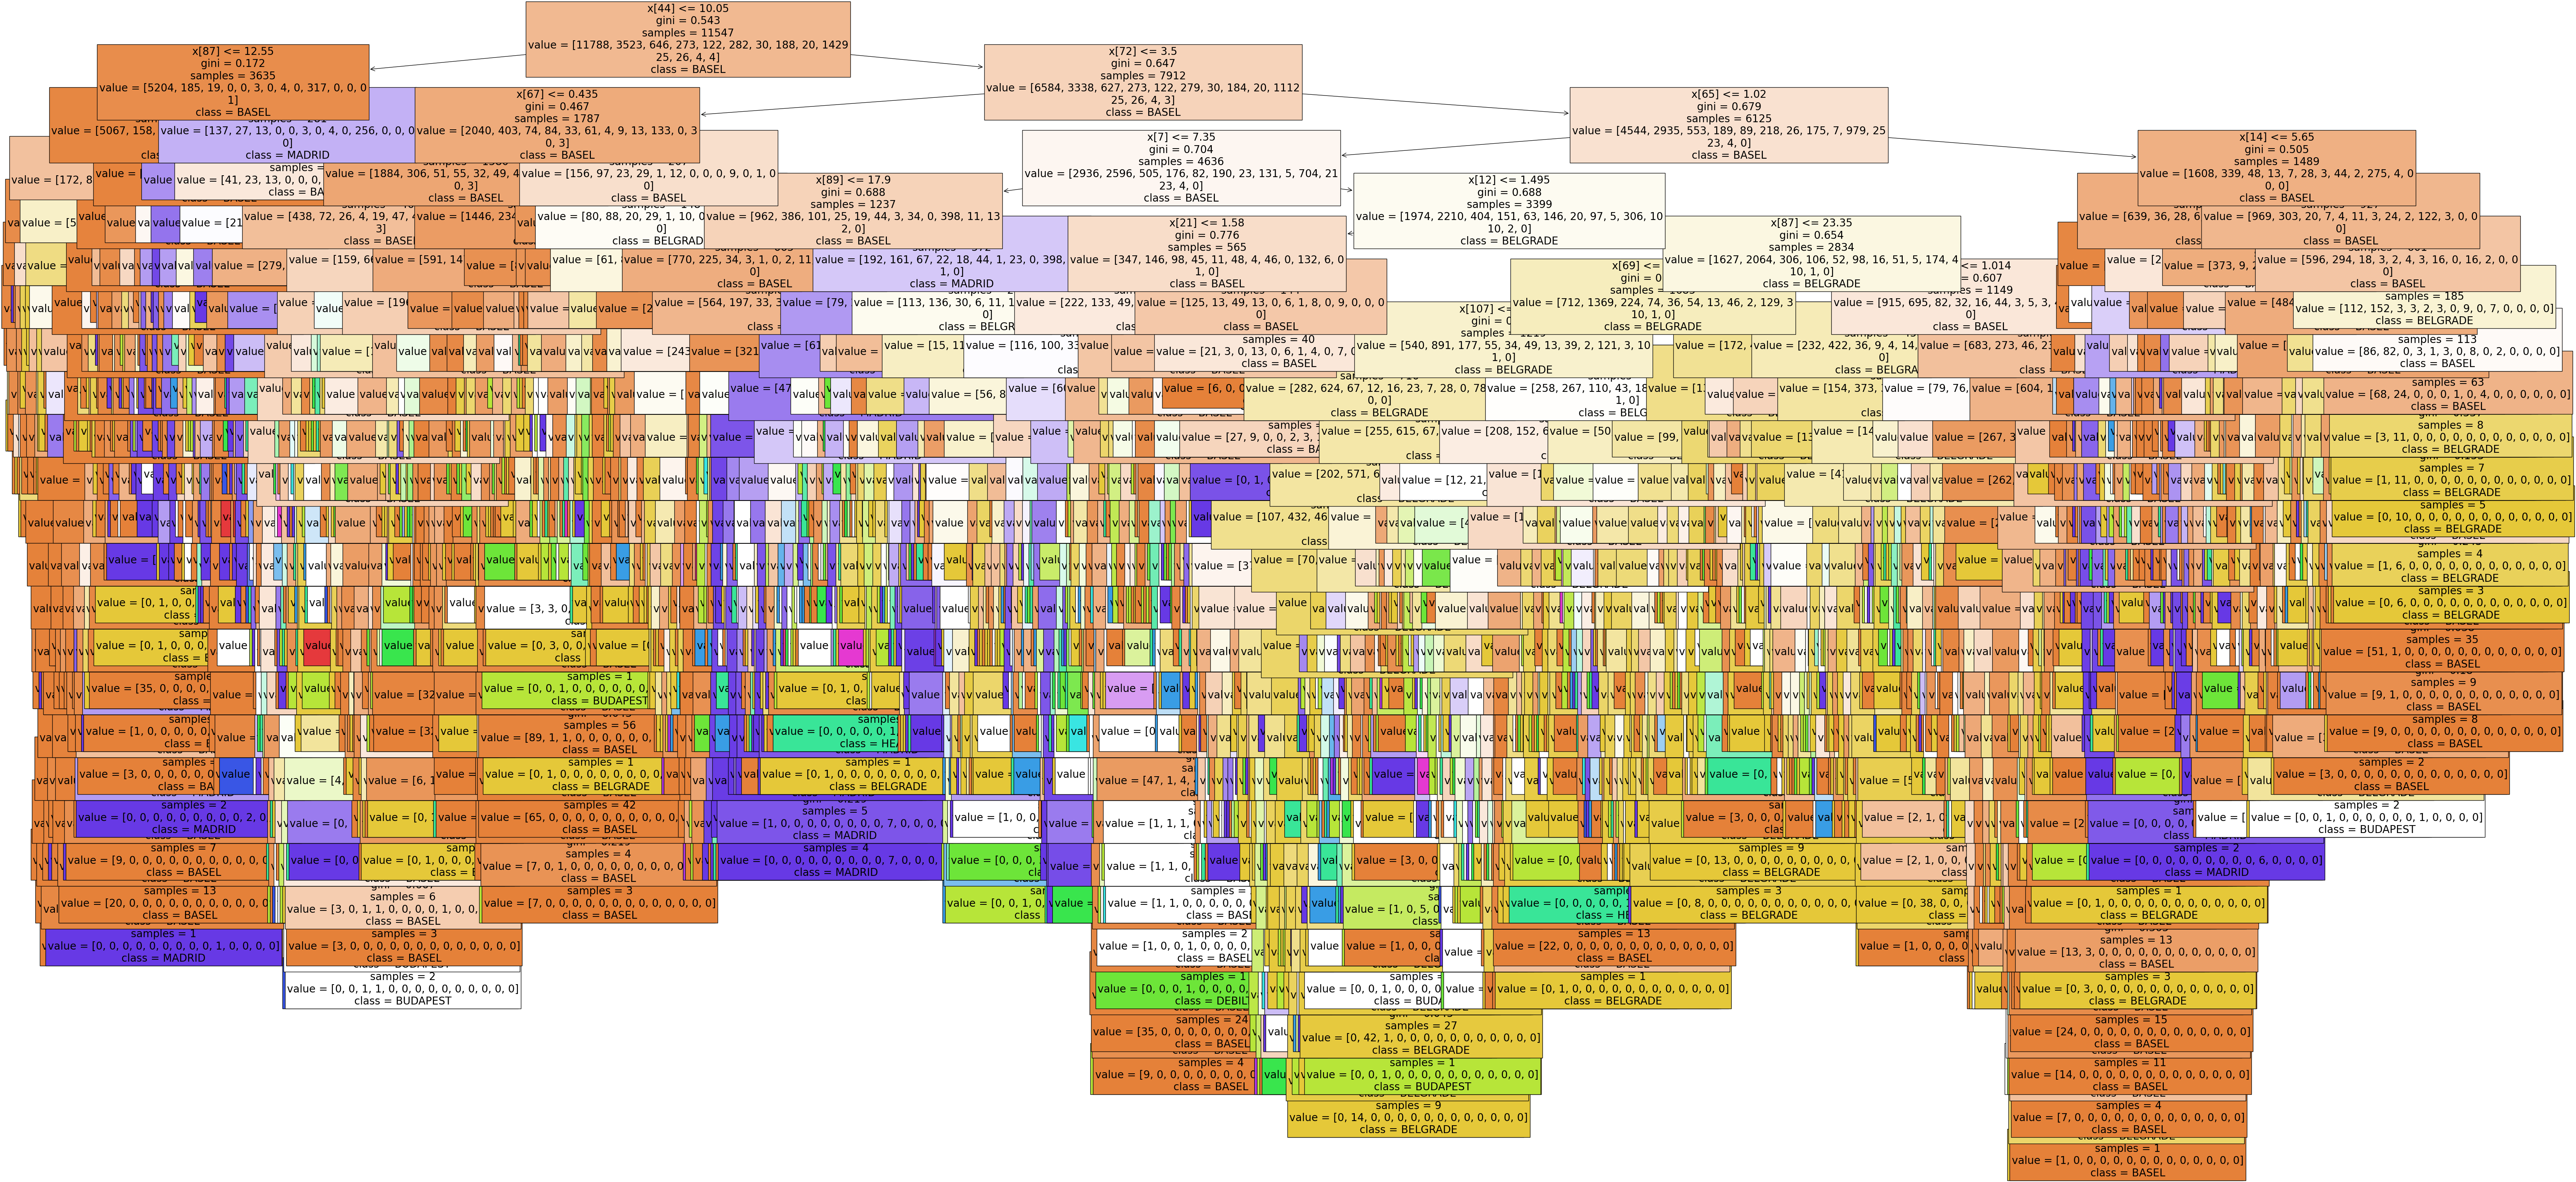

In [50]:
fig_1 = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=stations, filled=True); 

In [51]:
# Create a path
path_viz="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/04 Analysis/Visualizations"

In [52]:
fig_1.savefig(f"{path_viz}/ramdom_tree_opt_grid.png")

In [54]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01059675, 0.01174557, 0.00445479, 0.01440769, 0.08641244,
       0.02071703, 0.01223243, 0.00587799, 0.02443392, 0.00850368,
       0.00915745, 0.00629944, 0.01079616, 0.04005989, 0.01056016,
       0.02009416, 0.00939363, 0.02592685, 0.00222881, 0.00319422,
       0.00313827, 0.00714568, 0.0081241 , 0.00551389, 0.01045317,
       0.01081091, 0.01992156, 0.00171663, 0.00298744, 0.00689901,
       0.00490743, 0.00355059, 0.0031159 , 0.00507358, 0.00342075,
       0.0076923 , 0.00264974, 0.00314582, 0.00589285, 0.00458804,
       0.00542843, 0.00348079, 0.00790985, 0.00340085, 0.01446176,
       0.00206306, 0.00350972, 0.00525157, 0.00585211, 0.00255559,
       0.00345499, 0.00552373, 0.0038456 , 0.00880445, 0.00226011,
       0.00314986, 0.00627866, 0.00402895, 0.00381873, 0.0029956 ,
       0.00466926, 0.00314896, 0.00432898, 0.00228951, 0.00387463,
       0.00692793, 0.00609251, 0.00379799, 0.00408435, 0.01740088,
       0.00828194, 0.01711016, 0.00243464, 0.00326201, 0.00756

In [55]:
np.set_printoptions(threshold=1000)

In [56]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01059675, 0.01174557, 0.00445479, 0.01440769, 0.08641244,
         0.02071703, 0.01223243, 0.00587799, 0.02443392],
        [0.00850368, 0.00915745, 0.00629944, 0.01079616, 0.04005989,
         0.01056016, 0.02009416, 0.00939363, 0.02592685],
        [0.00222881, 0.00319422, 0.00313827, 0.00714568, 0.0081241 ,
         0.00551389, 0.01045317, 0.01081091, 0.01992156],
        [0.00171663, 0.00298744, 0.00689901, 0.00490743, 0.00355059,
         0.0031159 , 0.00507358, 0.00342075, 0.0076923 ],
        [0.00264974, 0.00314582, 0.00589285, 0.00458804, 0.00542843,
         0.00348079, 0.00790985, 0.00340085, 0.01446176],
        [0.00206306, 0.00350972, 0.00525157, 0.00585211, 0.00255559,
         0.00345499, 0.00552373, 0.0038456 , 0.00880445],
        [0.00226011, 0.00314986, 0.00627866, 0.00402895, 0.00381873,
         0.0029956 , 0.00466926, 0.00314896, 0.00432898],
        [0.00228951, 0.00387463, 0.00692793, 0.00609251, 0.00379799,
         0.00408435, 0.01740088, 0.0082819

In [57]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04828957, 0.06695911, 0.08395638, 0.09812347, 0.18660623,
       0.08346183, 0.14764814, 0.08371849, 0.20123677])

In [58]:
indicators=[
    "cloud cover",
    "humidity",
    "pressure",
    "global radiation",
    "precipitation",
    "sunshine",
    "temp mean",
    "temp min",
    "temp max"
]

In [59]:
important = pd.Series(sumarray, index = indicators) #.sort_values(ascending = False)
important

cloud cover         0.048290
humidity            0.066959
pressure            0.083956
global radiation    0.098123
precipitation       0.186606
sunshine            0.083462
temp mean           0.147648
temp min            0.083718
temp max            0.201237
dtype: float64

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\4112353917.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\4112353917.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_important = [important[i] for i in sorted_idx]
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  orde

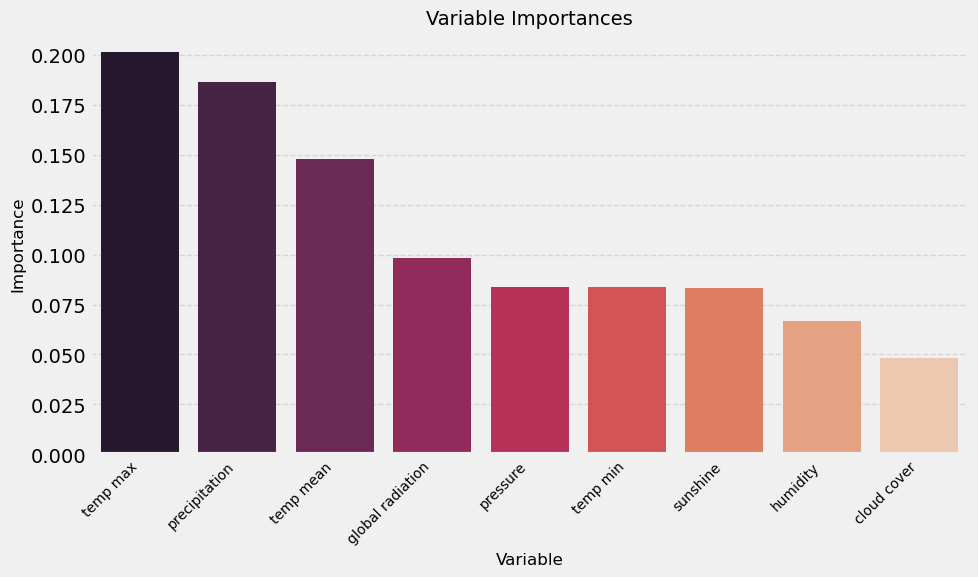

In [60]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Use the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define the figure size and layout
plt.figure(figsize=(10, 6))

# Sort the important variables and their corresponding indicators for better visual clarity
sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
sorted_important = [important[i] for i in sorted_idx]
sorted_indicators = [indicators[i] for i in sorted_idx]

# Plot the bar chart
sns.barplot(x=sorted_indicators, y=sorted_important, palette='rocket')

# Set the labels and title with improved aesthetics
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.title('Variable Importances', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.19087862, 0.14079143, 0.07053062, 0.03936363, 0.05095814,
       0.04086081, 0.03467911, 0.0698599 , 0.04702008, 0.1120871 ,
       0.06191801, 0.03435   , 0.04268128, 0.0350323 , 0.02898897])

In [62]:
important = pd.Series(sumarray, index = stations) #.sort_values(ascending = False)
important

BASEL         0.190879
BELGRADE      0.140791
BUDAPEST      0.070531
DEBILT        0.039364
DUSSELDORF    0.050958
HEATHROW      0.040861
KASSEL        0.034679
LJUBLJANA     0.069860
MAASTRICHT    0.047020
MADRID        0.112087
MUNCHENB      0.061918
OSLO          0.034350
SONNBLICK     0.042681
STOCKHOLM     0.035032
VALENTIA      0.028989
dtype: float64

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\944048951.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\944048951.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_important = [important[i] for i in sorted_idx]
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order 

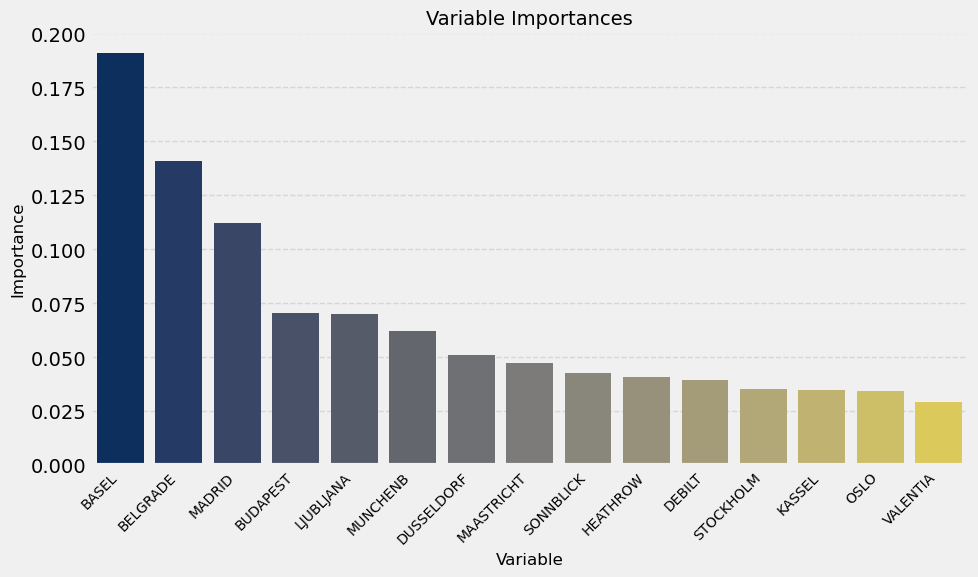

In [66]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Use the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define the figure size and layout
plt.figure(figsize=(10, 6))

# Sort the important variables and their corresponding stations for better visual clarity
sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
sorted_important = [important[i] for i in sorted_idx]
sorted_stations = [stations[i] for i in sorted_idx]

# Plot the bar chart
sns.barplot(x=sorted_stations, y=sorted_important, palette='cividis')

# Set the labels and title with improved aesthetics
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.title('Variable Importances', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### 4.2. Random Forest using the results from Random Search - All weather stations

In [68]:
# creating a RF classifier with the results from Random Search
clf4 = RandomForestClassifier(n_estimators = 360, max_depth=90, max_features=6, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=90, max_features=6,
                       min_samples_split=4, n_estimators=360)

In [69]:
# performing predictions on the test dataset
y_pred = clf4.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.900871459694989


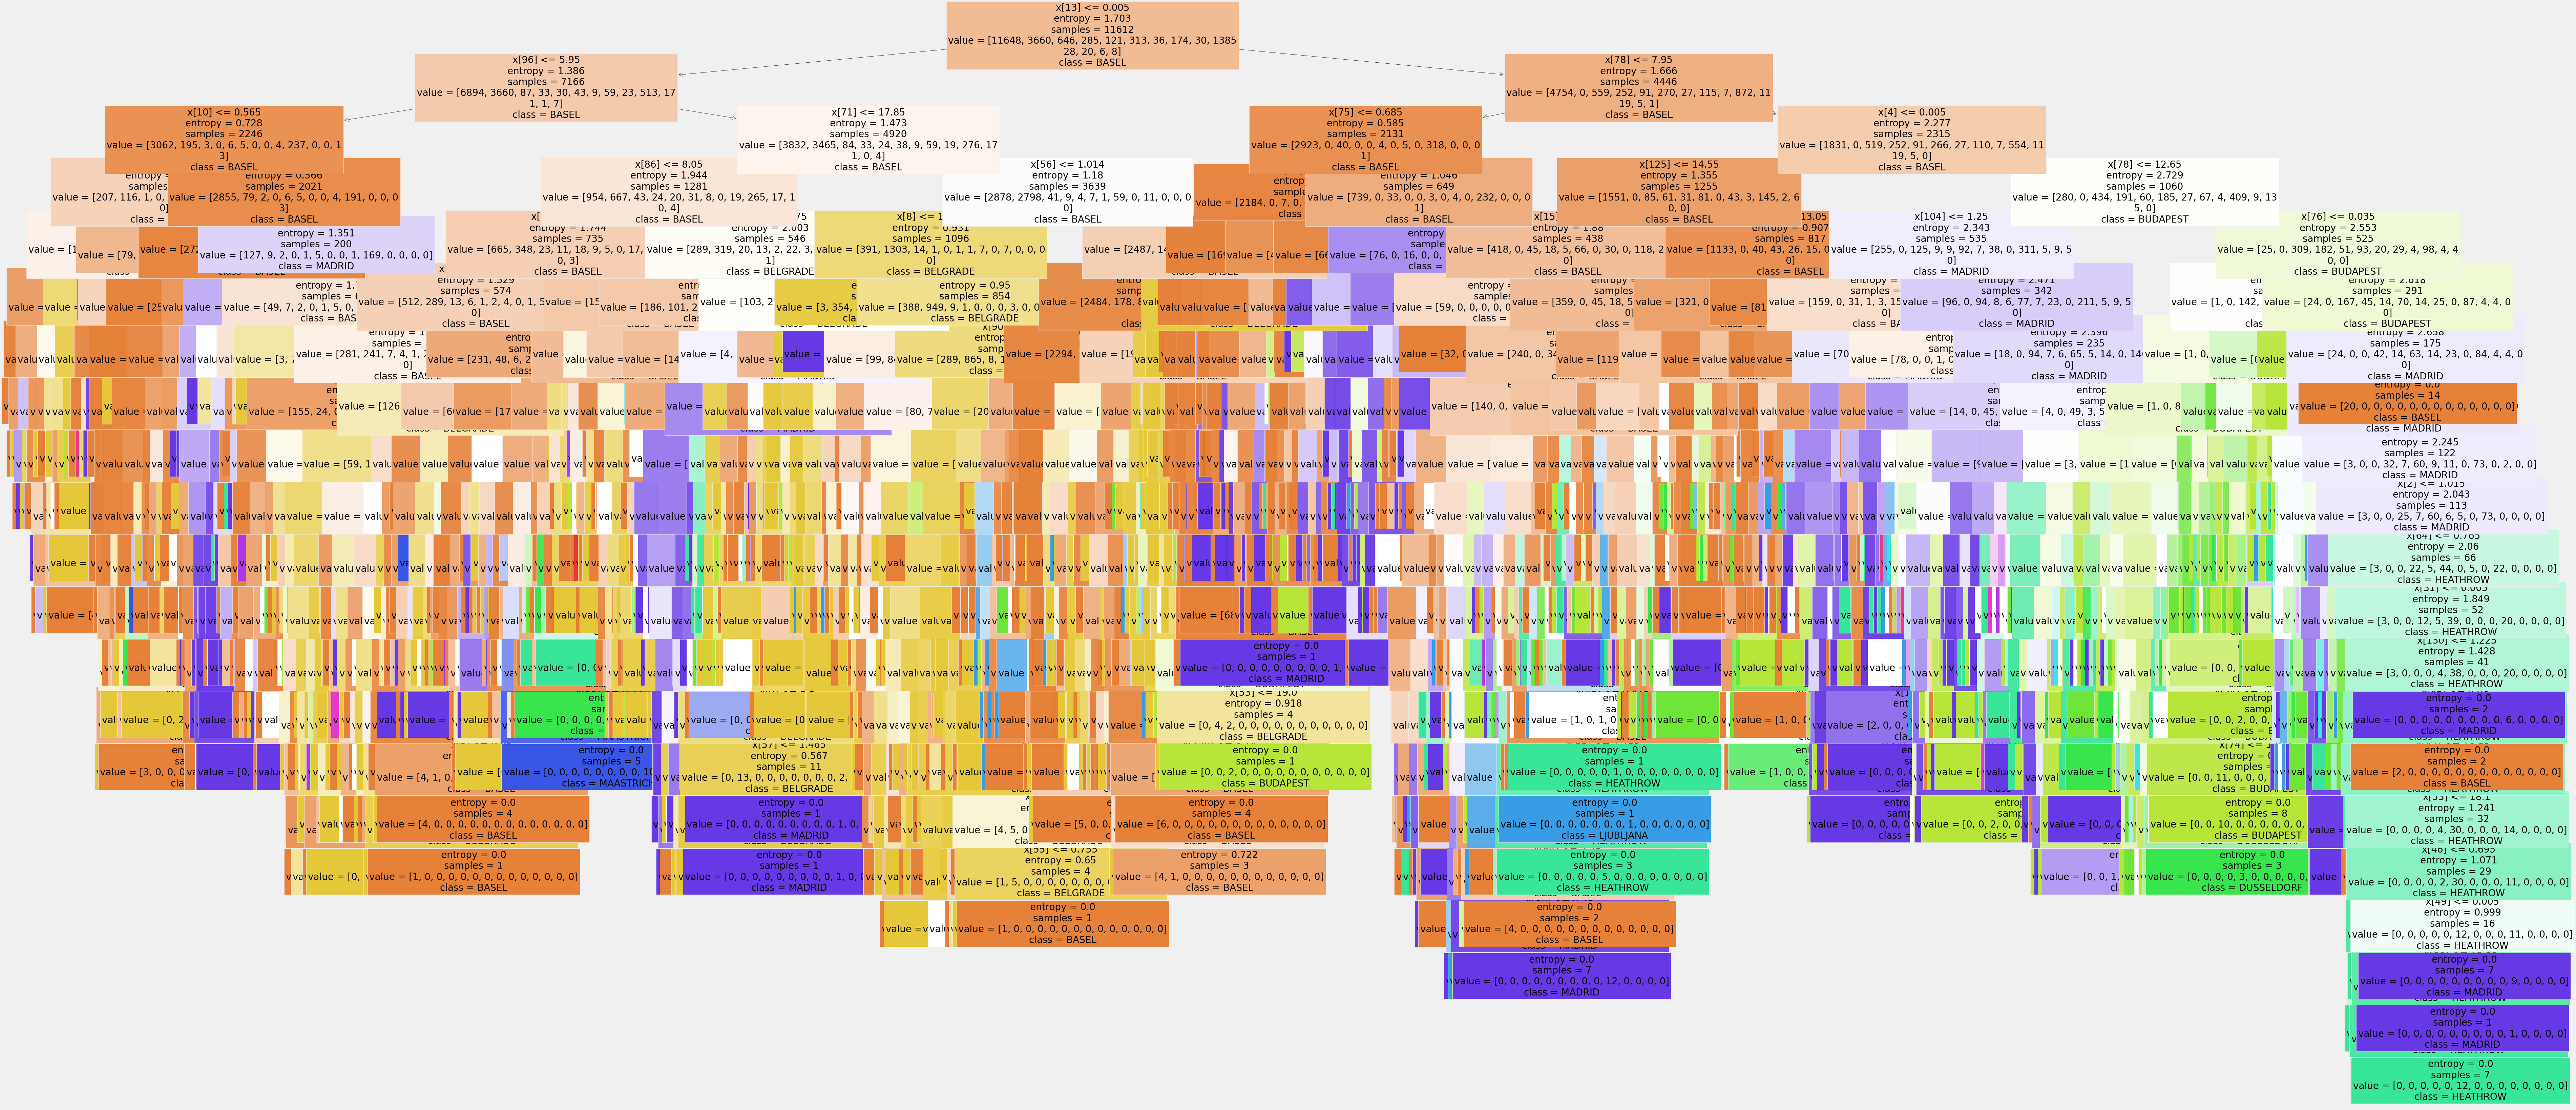

In [71]:
fig_2 = plt.figure(figsize=(80,40))
plot_tree(clf4.estimators_[15], fontsize = 20, class_names=stations, filled=True); 

In [72]:
np.set_printoptions(threshold=np.inf)
newarray = clf4.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01082145, 0.00956593, 0.00364779, 0.01182863, 0.06467063,
       0.01686245, 0.01130688, 0.00650669, 0.02108547, 0.01068277,
       0.00780443, 0.00625819, 0.00818442, 0.05237032, 0.01006788,
       0.0244724 , 0.01091305, 0.02871904, 0.00211918, 0.0028756 ,
       0.00296271, 0.00566194, 0.0152528 , 0.0051968 , 0.01474501,
       0.00921458, 0.01924409, 0.0018816 , 0.0029852 , 0.00624507,
       0.00498134, 0.00595626, 0.00343123, 0.00749391, 0.00366349,
       0.01218277, 0.00209827, 0.00290455, 0.0048645 , 0.00523165,
       0.00583558, 0.00352024, 0.00873165, 0.00389479, 0.0121239 ,
       0.00180294, 0.00341194, 0.00493934, 0.00636864, 0.00359192,
       0.00359322, 0.00674245, 0.00378702, 0.01158435, 0.00258918,
       0.00271787, 0.00487686, 0.00341535, 0.0031618 , 0.00281174,
       0.00591427, 0.00396771, 0.00595172, 0.00255551, 0.0043357 ,
       0.00619276, 0.00610551, 0.00487794, 0.00472456, 0.0171433 ,
       0.00937916, 0.0169263 , 0.00213684, 0.00306074, 0.00690

In [73]:
np.set_printoptions(threshold=1000)

In [74]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01082145, 0.00956593, 0.00364779, 0.01182863, 0.06467063,
         0.01686245, 0.01130688, 0.00650669, 0.02108547],
        [0.01068277, 0.00780443, 0.00625819, 0.00818442, 0.05237032,
         0.01006788, 0.0244724 , 0.01091305, 0.02871904],
        [0.00211918, 0.0028756 , 0.00296271, 0.00566194, 0.0152528 ,
         0.0051968 , 0.01474501, 0.00921458, 0.01924409],
        [0.0018816 , 0.0029852 , 0.00624507, 0.00498134, 0.00595626,
         0.00343123, 0.00749391, 0.00366349, 0.01218277],
        [0.00209827, 0.00290455, 0.0048645 , 0.00523165, 0.00583558,
         0.00352024, 0.00873165, 0.00389479, 0.0121239 ],
        [0.00180294, 0.00341194, 0.00493934, 0.00636864, 0.00359192,
         0.00359322, 0.00674245, 0.00378702, 0.01158435],
        [0.00258918, 0.00271787, 0.00487686, 0.00341535, 0.0031618 ,
         0.00281174, 0.00591427, 0.00396771, 0.00595172],
        [0.00255551, 0.0043357 , 0.00619276, 0.00610551, 0.00487794,
         0.00472456, 0.0171433 , 0.0093791

In [75]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.05001247, 0.06138283, 0.07417083, 0.0905535 , 0.18493458,
       0.07802411, 0.16047182, 0.08944896, 0.2110009 ])

In [76]:
important = pd.Series(sumarray, index = indicators) #.sort_values(ascending = False)
important

cloud cover         0.050012
humidity            0.061383
pressure            0.074171
global radiation    0.090554
precipitation       0.184935
sunshine            0.078024
temp mean           0.160472
temp min            0.089449
temp max            0.211001
dtype: float64

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\4112353917.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\4112353917.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_important = [important[i] for i in sorted_idx]
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  orde

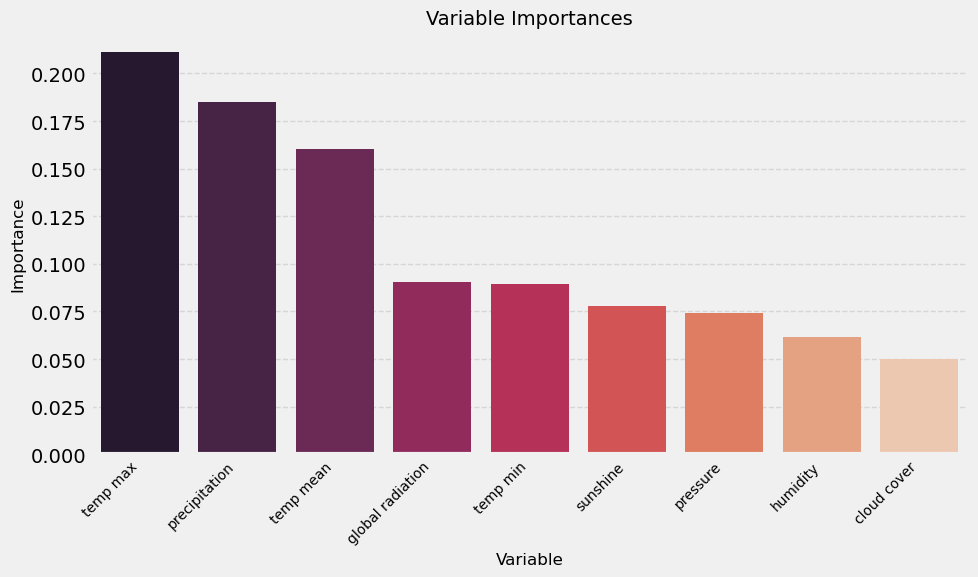

In [77]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Use the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define the figure size and layout
plt.figure(figsize=(10, 6))

# Sort the important variables and their corresponding indicators for better visual clarity
sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
sorted_important = [important[i] for i in sorted_idx]
sorted_indicators = [indicators[i] for i in sorted_idx]

# Plot the bar chart
sns.barplot(x=sorted_indicators, y=sorted_important, palette='rocket')

# Set the labels and title with improved aesthetics
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.title('Variable Importances', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.15629593, 0.15947251, 0.07727272, 0.04882087, 0.04920514,
       0.04582184, 0.03540652, 0.07224074, 0.04975738, 0.10073619,
       0.06296131, 0.03587019, 0.04439236, 0.03476871, 0.02697761])

In [79]:
important = pd.Series(sumarray, index = stations) #.sort_values(ascending = False)
important

BASEL         0.156296
BELGRADE      0.159473
BUDAPEST      0.077273
DEBILT        0.048821
DUSSELDORF    0.049205
HEATHROW      0.045822
KASSEL        0.035407
LJUBLJANA     0.072241
MAASTRICHT    0.049757
MADRID        0.100736
MUNCHENB      0.062961
OSLO          0.035870
SONNBLICK     0.044392
STOCKHOLM     0.034769
VALENTIA      0.026978
dtype: float64

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\944048951.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_18308\944048951.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_important = [important[i] for i in sorted_idx]
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order 

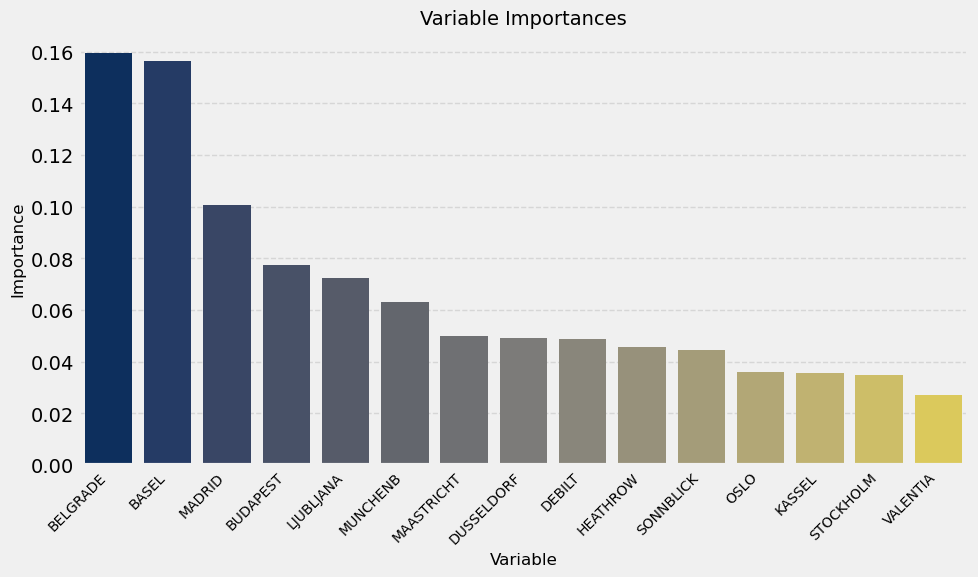

In [80]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Use the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define the figure size and layout
plt.figure(figsize=(10, 6))

# Sort the important variables and their corresponding stations for better visual clarity
sorted_idx = sorted(range(len(important)), key=lambda k: important[k], reverse=True)
sorted_important = [important[i] for i in sorted_idx]
sorted_stations = [stations[i] for i in sorted_idx]

# Plot the bar chart
sns.barplot(x=sorted_stations, y=sorted_important, palette='cividis')

# Set the labels and title with improved aesthetics
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.title('Variable Importances', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()